In [2]:
import pandas as pd
import numpy as np

In [3]:
#importing and reading the dataset
data = pd.read_csv("FraudDetection Dataset.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#checking the column types
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
#checking the number of fraud and non-fraud transactions
data["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [6]:
#checking the number of null values in the dataset
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
#checking the dataset shape
data.shape

(6362620, 11)

In [8]:
#confirming the rate - fraud percentange in the dataset
((data["isFraud"].value_counts()[1]) / data.shape[0]) * 100

np.float64(0.12908204481801522)

0.13 % of our data comprises of fraud

Performing Exploratory data analysis

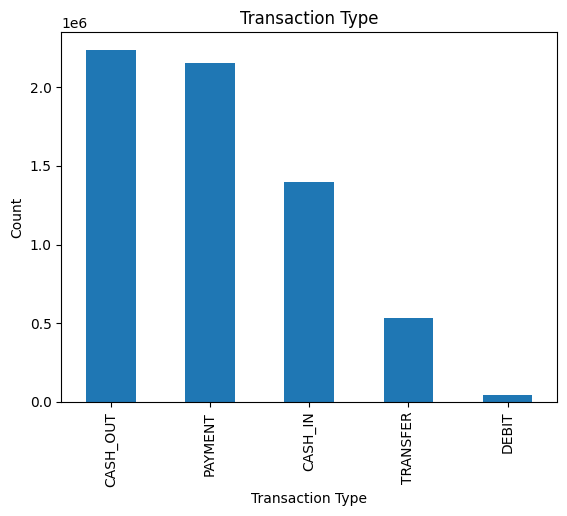

In [9]:
#Visualizing transactions types so as to undeerstand the different kind of transactions in this dataset
import matplotlib.pyplot as plt
data["type"].value_counts().plot(kind="bar", title = "Transaction Type"),
color = "margenta"
plt.ylabel("Count")
plt.xlabel("Transaction Type")
plt.show()


We can see from the bar chart above most of the customers are cashing out with a few of them using Debit(sending money
from the mobile money service to a bank account)

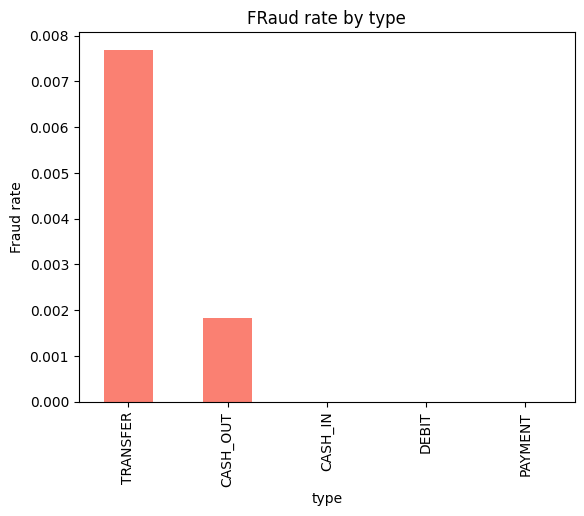

In [10]:
#visualizing fraud rates by type
fraud_type = data.groupby("type")['isFraud'].mean().sort_values(ascending=False)
fraud_type.plot(kind="bar", title = "FRaud rate by type", color= "salmon")
plt.ylabel("Fraud rate")
plt.show()
#note that "cash_in", "debit", and "payment" contain zero frauds

From the bar chart above, alot of frauds occur during transfer transactions. No fraud was asociatwd with "cash_in", "Debit" and "Payment" in this dataset.

In [11]:
#checking the descriptive statistics for the column amount 
data["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\collins\appdata\local\programs\python\python313\lib\site-packages (0.13.2)




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


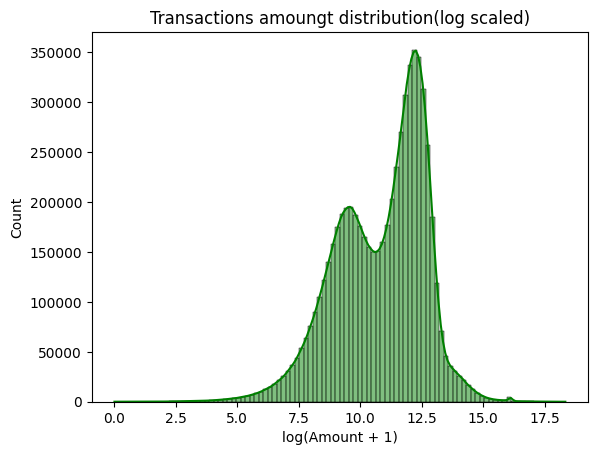

In [13]:
#visualizing the column amount using an histogram
import seaborn as sns
sns.histplot(np.log1p(data["amount"]), bins = 100, kde = True, color = "green")
#log1p(amount) calculates log(1 + amount). This is useful when dealing with data where a few large values can heavily influence the distribution.Taking the logarithm helps to compress the range of values, making the distribution easier to visualize
#KDE(Kernel Density Distribution) is used to visualize the distribution of data.
plt.title("Transactions amoungt distribution(log scaled)")
plt.xlabel("log(Amount + 1)")
plt.show()

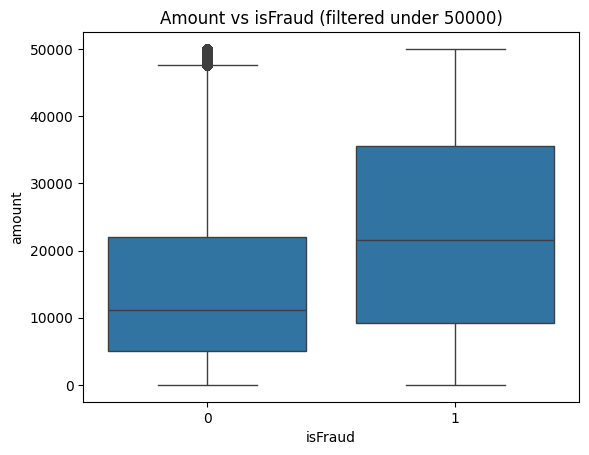

In [14]:
#finding the relationship between fraud and amount using a boxplot
sns.boxplot(data = data[data["amount"] < 50000], x = "isFraud", y = "amount")
plt.title("Amount vs isFraud (filtered under 50000)")
plt.show()

In [ ]:
#checking the balance changes and anomalies
#creating two different columns as balance difference of the origin account and desrtination account.
#we then try and see if there is any negative balance.
data["balanceDiffOrig"] = data["oldbalanceOrg"] - data["newbalanceOrig"]
data["balanceDiffDest"] = data["newbalanceDest"] - data["oldbalanceDest"]


In [15]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [16]:
#checking for negative values in "balanceDiffOrig"
(data["balanceDiffOrig"] < 0).sum()
#this outputs a large value showing that there are many negative values in this column.
#this is because of the column "step"  which is dyanamic and keeps on changing

np.int64(1399253)

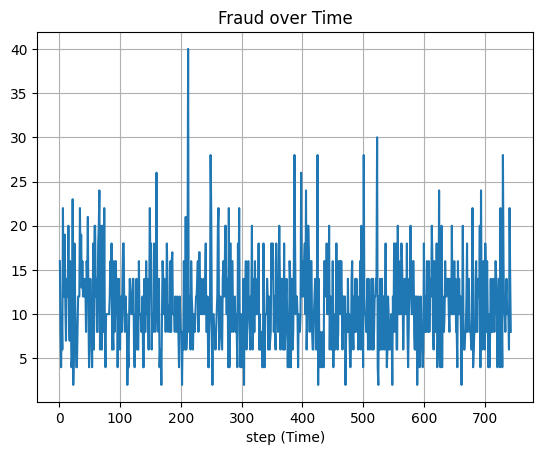

In [ ]:
#checking the number of frauds per step
fraud_per_step = data[data["isFraud"] ==1]["step"].value_counts().sort_index()
#.sort_index(): This method sorts the resulting Series by its index (which represents the "step" values) in ascending order
plt.plot(fraud_per_step.index, fraud_per_step.values, label = "Fraud per step")
#fraud_per_step.index: This provides the x-coordinates for the plot, which are the "step" values (time).
#fraud_per_step.values: This provides the y-coordinates for the plot, which are the counts of fraudulent transactions at each step.
plt.xlabel("step (Time)")
plt.title("Fraud over Time")
plt.grid(True)
plt.show()

In [18]:
#inorder to standardize our data and prepare it for modelling, we drop "step" column.
data.drop(columns= "step", inplace= True)
data.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [19]:
#Finding the customer that makes the highest transactions
high_senders =data["nameOrig"].value_counts().head(10)
high_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [20]:
#Finding the receiver that makes the highest transactions
high_receiver =data["nameDest"].value_counts().head(10)
high_receiver

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [21]:
#checking the number of fraud users per name
fraud_users = data[data["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [22]:
data.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [23]:
#analyzing transfer and cash_out, the most common for fraud columns.
type_of_fraud = data[data["type"].isin(["TRANSFER", "CASH_OUT"])]
type_of_fraud.head()


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [24]:
type_of_fraud["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

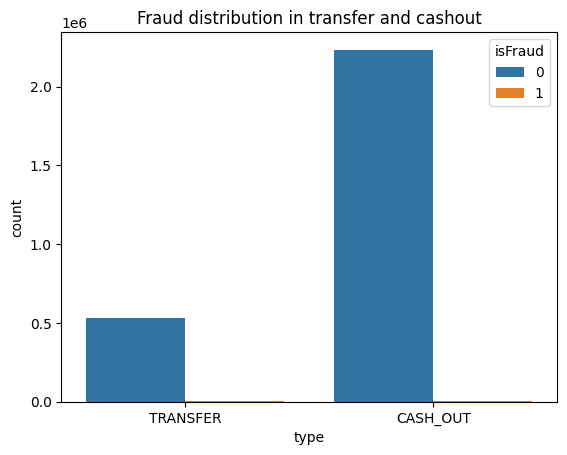

In [25]:
#creating a countplot to visualize this fraud type
sns.countplot(data=type_of_fraud, x="type", hue="isFraud")# this line plots the count of occurences
# "hue = ..." adds a color split within each "type" bar based on whether the transaction is fraudulent
plt.title("Fraud distribution in transfer and cashout")
plt.show()

In [26]:
#Finding the correlation matrix
corr = data[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


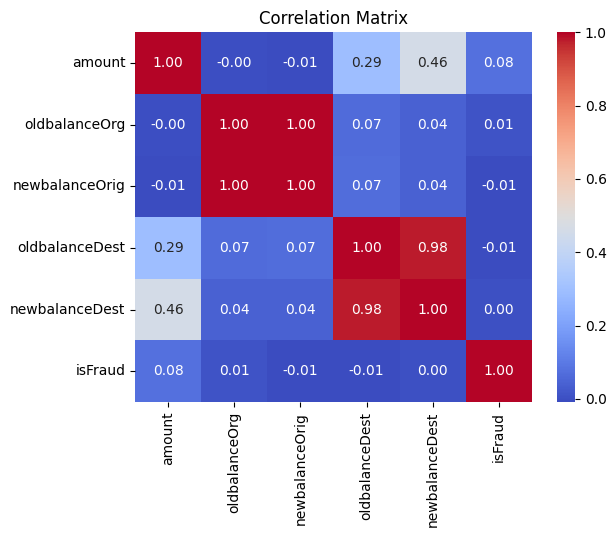

In [ ]:
#visualizing the correlation using an heatmap
sns.heatmap(corr, annot = True, cmap="coolwarm", fmt=".2f")
# annot = True; displays the correlation coefficient values on each cell of the heatmap
#fmt=".2f": This argument is used in conjunction with annot=True, two dp
plt.title("Correlation Matrix")
plt.show()

In [28]:
#Identifying customers with zero balance after transfer
zero_after_transfer = data[
    (data["oldbalanceOrg"] > 0) &
    (data["newbalanceOrig"] == 0) &
    (data["type"].isin(["TRANSFER", "CASH_OUT"]))
]
len(zero_after_transfer)
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


Feature selection and preparation

In [ ]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#dropping unnecessary columns
data_model = data.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis = 1)
#the argument axis=1 tells Pandas to drop columns, not rows.
data_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [ ]:
#sorting categorical and numeric data type
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [ ]:
#setting the target
y = data_model["isFraud"]
X = data_model.drop("isFraud", axis = 1)
# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)
#test_size=0.3; 30% of the data will go to the test set.
#stratify=y; Ensures that the proportion of class labels in y (e.g., 0s and 1s in this fraud detection task) is preserved in both the training and test sets. This is important since our fraud dataset contains rare cases of fraud


Performing dat preprocessing

In [ ]:
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric), #StandardScaler standardizes features by removing the mean and scaling to unit variance . Numeric - instructs the standardScaler to act on only numeric values.
        ("cat", OneHotEncoder(drop = "first"), categorical)
        #drop = "first": This argument is important for avoiding multicollinearity.
    ],
    remainder="drop" #remainder="drop" means that any columns not specified in numeric or categorical will be dropped from the dataset during preprocessing. 
)
#pipeline creation
PIpeline = Pipeline([ #This section defines a scikit-learn Pipeline, which sequentially applies a list of transformers and a final estimator.
    ("prep", preprocessor), #preprocessor will apply all the numerical scaling and categorical one-hot encoding.
    ("clf", LogisticRegression(class_weight="balanced", max_iter = 1000)) # clf = classifier
])
#Logistic regression is the last estimator.
# class_weight="balanced" - When set to "balanced", the algorithm automatically adjusts weights inversely proportional to class frequencies. This helps the model pay more attention to the minority class (fraud) during training.


In [33]:
#model training with the preprocessor
PIpeline.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [34]:
#Making predictions
y_pred = PIpeline.predict(X_test)

In [35]:
#Printing the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [ ]:
#Getting the confusion matrix
#Confusion matrix is a fundamental tool for evaluating the performance of a classification model.
confusion_matrix(y_test,y_pred)

array([[1801549,  104773],
       [    156,    2308]])

In [37]:
#checking the accuracy score of the model
PIpeline.score(X_test, y_test) * 100

94.50284107280753

This model has an accuracy score of 94.36%

In [38]:
#Saving our model
import joblib
joblib.dump(PIpeline, "Fraud_detection_pipeline.pkl")

['Fraud_detection_pipeline.pkl']

When this code runs, joblib takes the entire PIpeline object, including all its internal states (e.g., the learned scaling parameters from StandardScaler, the categories identified by OneHotEncoder, and the trained coefficients of the LogisticRegression model), and converts it into a binary format. This binary data is then written to the file named "Fraud_detection_pipeline.pkl" on your disk.

Creating App (front interface)

In [39]:
pip install streamlit


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB 2.2 MB/s eta 0:00:05
   --------- ------------------------------ 2.4/9.9 MB 3.5 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.9 MB 3.7 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.9 MB 3.9 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.9 MB 4.3 MB/s eta 0:00:02
   --------------------------- ------------ 6.8/9.9 MB 4.5 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.9 MB 4.5 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.9 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 4.3 MB/s eta 0:00:00
   -----------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
